Name Surname: WERONIKA JOPEK

Student No: 912400002



Libraries to be used

---



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Build your own code-base (30 points)

Implement the methods provided and compare your implementation with Sklearn library

---

K-Nearest Neighbour (5 points)

In [3]:
class KNN:
    def __init__(self, train_data, train_label, k=3):
        self.k = k
        self.train_data = train_data
        self.train_label = train_label

    def predict(self, test_data):

        # creating a list for storing predictions for each test sample
        predictions = []

        for test_point in test_data:

            # calculating Euclidean distances between test point and all training samples
            distances = np.linalg.norm(self.train_data - test_point, axis=1)

            # finding the smallest distances of the k closet training samples
            k_indices = np.argsort(distances)[:self.k]

            # finding labels of the k closest training samples
            k_labels = self.train_label[k_indices]

            # finding the most common label
            prediction = np.bincount(k_labels).argmax()

            # adding the predicted label
            predictions.append(prediction)

        # converting the list into array
        return np.array(predictions)
        pass


Gaussian Naive Bayes (5 points)

In [26]:
class GNB:
    def __init__(self, train_data, train_label):
        self.train_data = train_data
        self.train_label = train_label
        self.classes = np.unique(train_label)

    # calculate Gaussian probability density function for given values
    def gaussian_probability(self, x, mean, std):

        # addind this to avoid division by zero
        std = np.maximum(std, 1e-6)
        # calculating exponent
        exponent = np.exp(-((x - mean)**2) / (2 * std**2))

        # returning gaussian pdf value
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

        pass

    # fitting the model to the training data by calculating statistics for each class
    def fit(self):

        # creating directory for storing statistics for each class
        self.class_stats = {}

        for cls in self.classes:

            # selecting all data points (all rows) corresponding to the current class
            cls_data = self.train_data[self.train_label == cls]

            # storing the statistics for the current class
            self.class_stats[cls] = {
                "mean": np.mean(cls_data, axis=0),
                "std": np.std(cls_data, axis=0),
                "prior": len(cls_data) / len(self.train_label)
            }

        pass

    # predicting the class labels for the given test data
    def predict(self, test_data):

        # creating list for storing predictions for each test sample
        predictions = []

        for test_point in test_data:

            # creating dictionary for storing log probabilities for each class
            class_probs = {}

            for cls, stats in self.class_stats.items():

                # caclulating log of the prior probability for the current class
                prior = np.log(stats["prior"])

                # calculating log of the likelihood for the current test point
                # this is the sum of log probabilities for all features in the test point
                likelihood = np.sum(
                    np.log(self.gaussian_probability(test_point, stats["mean"], stats["std"]) + 1e-6)
                )

                # adding the log prior and log likelihood to get the log posterior probability
                class_probs[cls] = prior + likelihood

            # finding the class with the highest log posterior probability
            predictions.append(max(class_probs, key=class_probs.get))

        # converting the list into array
        return np.array(predictions)

        pass


Principal Component Analysis (5 points)

In [40]:
class PCA:

  def __init__(self, data, n_components):
        self.data = data
        self.n_components = n_components

  def fit(self):

        # centering the data by subtracting the mean of each feature
        data_centered = self.data - np.mean(self.data, axis=0)

        # calculate covariance matrix of the centered data
        covariance_matrix = np.cov(data_centered, rowvar=False)

        # calculate eigenvalues and eigenvectors of covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # sorting indices of the eigenvalues in desc order
        sorted_indices = np.argsort(eigenvalues)[::-1]

        # selecting the top n components eigenvectors corresponding to the largest eigenvalues
        self.eigenvectors = eigenvectors[:, sorted_indices][:, :self.n_components]

        pass

  def transform(self, x):

        # centering the input data using the mean of the original training data
        x_centered = x - np.mean(self.data, axis=0)

        # projecting the centered data onto the principal components
        return np.dot(x_centered, self.eigenvectors)

        pass

Metrics (2+3 points)



In [41]:
def rmse(y_true, y_pred):

  # calculating and returning mean squared error and taking its square root
  return np.sqrt(np.mean((y_true - y_pred)**2))

  pass

def accuracyNf1_score(y_true, y_pred):

  # caclculating accuracy - the proportion of correctly predicted labels
  accuracy = np.sum(y_true == y_pred) / len(y_true)

  # calculating number of true positives
  tp = np.sum((y_true == y_pred) & (y_true == 1))

  # calculating number of false positives
  fp = np.sum((y_pred == 1) & (y_true == 0))

  # calculating number of false negatives
  fn = np.sum((y_pred == 0) & (y_true == 1))

  # calculating precision - the proportion of true positives out of predicted positives
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0

  # rcalculating ecall - the proportion of true positives out of actual positives
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0

  # calculating f1 score - the harmonic mean of precision and recall
  f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  return accuracy, f1

  pass


Visualization Tools (5 points)

In [42]:
# creating a function to vizualize results

def plot_digits(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


KNN Accuracy: 0.9861111111111112
GNB Accuracy: 0.5777777777777777
PCA transformed shape: (360, 10)


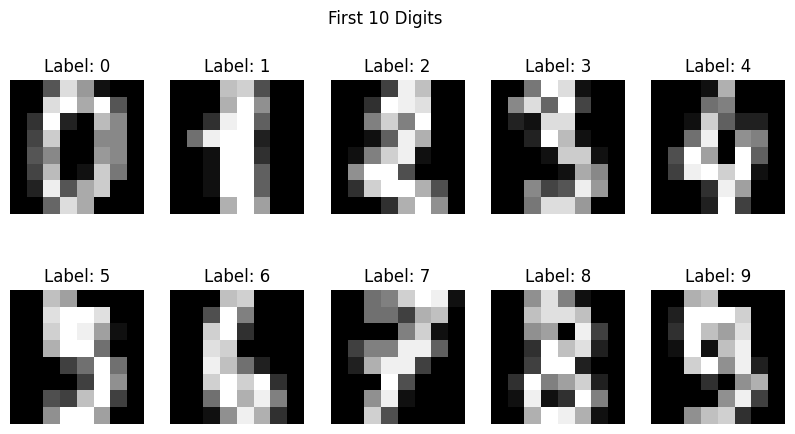

In [43]:
# loading the digits dataset
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# K-Nearest Neighbors
knn = KNN(X_train, y_train, k=5)
knn_predictions = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

# Gaussian Naive Bayes
gnb = GNB(X_train, y_train)
gnb.fit()
gnb_predictions = gnb.predict(X_test)
print("GNB Accuracy:", accuracy_score(y_test, gnb_predictions))

# PCA
pca = PCA(X_train, n_components=10)
pca.fit()
transformed_data = pca.transform(X_test)
print("PCA transformed shape:", transformed_data.shape)

# plotting first 10 images with their labels
plot_digits(digits.images, digits.target, "First 10 Digits")


# Experiments (45 points)

Use Sklearn classes

---

Dataset preparation

In [31]:
# Load dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

# Calculate the frequency of each class in the training set
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)

for cls_train, count_train, cls_test, count_test in zip(unique_classes_train, class_counts_train, unique_classes_test, class_counts_test):
  print(f"Class {cls_train}: {count_train} train  {count_test} test {count_train/count_test} ratio")

Class 0: 144 train  34 test 4.235294117647059 ratio
Class 1: 137 train  45 test 3.0444444444444443 ratio
Class 2: 150 train  27 test 5.555555555555555 ratio
Class 3: 145 train  38 test 3.8157894736842106 ratio
Class 4: 145 train  36 test 4.027777777777778 ratio
Class 5: 144 train  38 test 3.789473684210526 ratio
Class 6: 146 train  35 test 4.171428571428572 ratio
Class 7: 142 train  37 test 3.8378378378378377 ratio
Class 8: 143 train  31 test 4.612903225806452 ratio
Class 9: 141 train  39 test 3.6153846153846154 ratio


Apply classification methods using the dataset directly (10 points)
(paramtre denemeleri tarzı şeyler)

In [32]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb_predictions))


Logistic Regression Accuracy: 0.9666666666666667
KNN Accuracy: 0.9722222222222222
Gaussian Naive Bayes Accuracy: 0.85


Apply PCA and find optimal #components with the best recontruction (RMSE) as the objective (10 points)

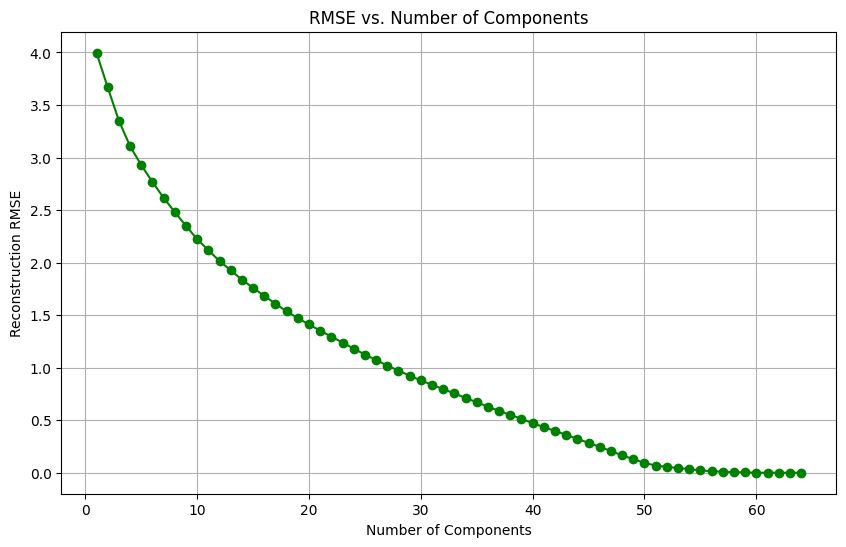

Optimal Number of Components: 64


In [33]:
from sklearn.decomposition import PCA

# applying PCA and optimizing the number of components based on RMSE
rmse_scores = []
components = range(1, X_train.shape[1] + 1)

for n in components:

    # using sklearn PCA
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_reconstructed = pca.inverse_transform(pca.transform(X_train))
    score = rmse(X_train, X_train_reconstructed)
    rmse_scores.append(score)

# plot of RMSE vs. Number of Components
plt.figure(figsize=(10, 6))
plt.plot(components, rmse_scores, marker='o', color = "green")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction RMSE")
plt.title("RMSE vs. Number of Components")
plt.grid()
plt.show()

# calculating number of components based on minimum RMSE
optimal_components = components[np.argmin(rmse_scores)]
print("Optimal Number of Components:", optimal_components)


Apply PCA class-wise and merge the transformed features (10 points)

In [34]:
# PCA class-wise
class_wise_pca_data = []
for cls in np.unique(y_train):
    class_data = X_train[y_train == cls]
    pca = PCA(n_components=3)
    pca.fit(class_data)
    transformed = pca.transform(class_data)
    class_wise_pca_data.append(transformed)

# merging the transformed features
merged_features = np.vstack(class_wise_pca_data)
merged_labels = np.hstack([np.full(transformed.shape[0], cls) for cls, transformed in zip(np.unique(y_train), class_wise_pca_data)])

print("Class-Wise PCA Features Shape:", merged_features.shape)


Class-Wise PCA Features Shape: (1437, 3)


Apply classification methods on the transformed features (PCA outputs) both nomral and class-wise (15 points)
(normal PCA dimension 30, class-wise PCA dimension 3x10)

In [35]:
# applying PCA with a fixed number of components (normal PCA)
pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# LR on normal PCA features
log_reg.fit(X_train_pca, y_train)
log_reg_pca_predictions = log_reg.predict(X_test_pca)
print("Logistic Regression Accuracy (Normal PCA):", accuracy_score(y_test, log_reg_pca_predictions))

# classification using PCA class-wise features
# splitting merged features into train subset and test subset
X_train_class_pca, X_test_class_pca, y_train_class_pca, y_test_class_pca = train_test_split(
    merged_features, merged_labels, test_size=0.2, random_state=42)

# LR on PCA class-wise features
log_reg.fit(X_train_class_pca, y_train_class_pca)
log_reg_class_pca_predictions = log_reg.predict(X_test_class_pca)
print("Logistic Regression Accuracy (Class-Wise PCA):", accuracy_score(y_test_class_pca, log_reg_class_pca_predictions))


Logistic Regression Accuracy (Normal PCA): 0.9583333333333334
Logistic Regression Accuracy (Class-Wise PCA): 0.052083333333333336
